In [120]:
# computational import
import numpy as np
import xarray as xr

# plotting import
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.feature as cfeature
import cmocean

In [121]:
# open density datasets
ds = {}
ds15 = {}
list11 = np.linspace(1,11,11)
for i in list11:
    ds[int(i)] = xr.open_dataset('/Users/elifaigle/Desktop/aws_density/hycom_aws_density_'+str(int(i))+'.nc')
    ds15[int(i)] = xr.open_dataset('/Users/elifaigle/Desktop/aws_density/hycom_aws_density_'+str(int(i))+'_15m.nc')

In [122]:
# designate bins
lon = np.linspace(-180,180, 360*2)
lat = np.linspace(-90, 90, 180*2)

In [123]:
# calculate average density
for i in list11:
    if i == 1:
        den = ds[int(i)]['den']
        den15 = ds15[int(i)]['den']
# add steps together
    else:
        den = den + ds[int(i)]['den']
        den15 = den15 + ds15[int(i)]['den']
den = den/11
den15 = den15/11

In [94]:
# declare indices of latitude boundaries (-70 N to 75 N)
lat1, lat2 = 40, 329

In [85]:
den.lat[40]

<xarray.DataArray 'lat' ()>
array(-69.94429, dtype=float32)
Coordinates:
    lat      float32 -69.94

In [95]:
den.lat[329]

<xarray.DataArray 'lat' ()>
array(74.95821, dtype=float32)
Coordinates:
    lat      float32 74.96

In [96]:
den

<xarray.DataArray 'den' (lon: 719, lat: 359)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lon      (lon) float32 -180.0 -179.5 -179.0 -178.5 ... 178.5 179.0 179.5
  * lat      (lat) float32 -90.0 -89.5 -89.0 -88.5 ... 87.99 88.5 89.0 89.5

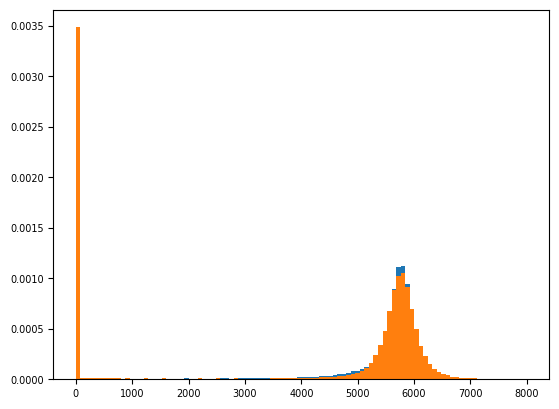

In [114]:
# create histograms to plot in subplot
n, bins, patches = plt.hist(x = den[:,lat1:lat2].values.flatten(), bins = 100, histtype='stepfilled', 
                            align = 'mid', density = True, range = (0,8000))
n15, bins15, patches15 = plt.hist(x = den15[:,lat1:lat2].values.flatten(), bins = 100, histtype='stepfilled', 
                            align = 'mid', density = True, range = (0,8000))


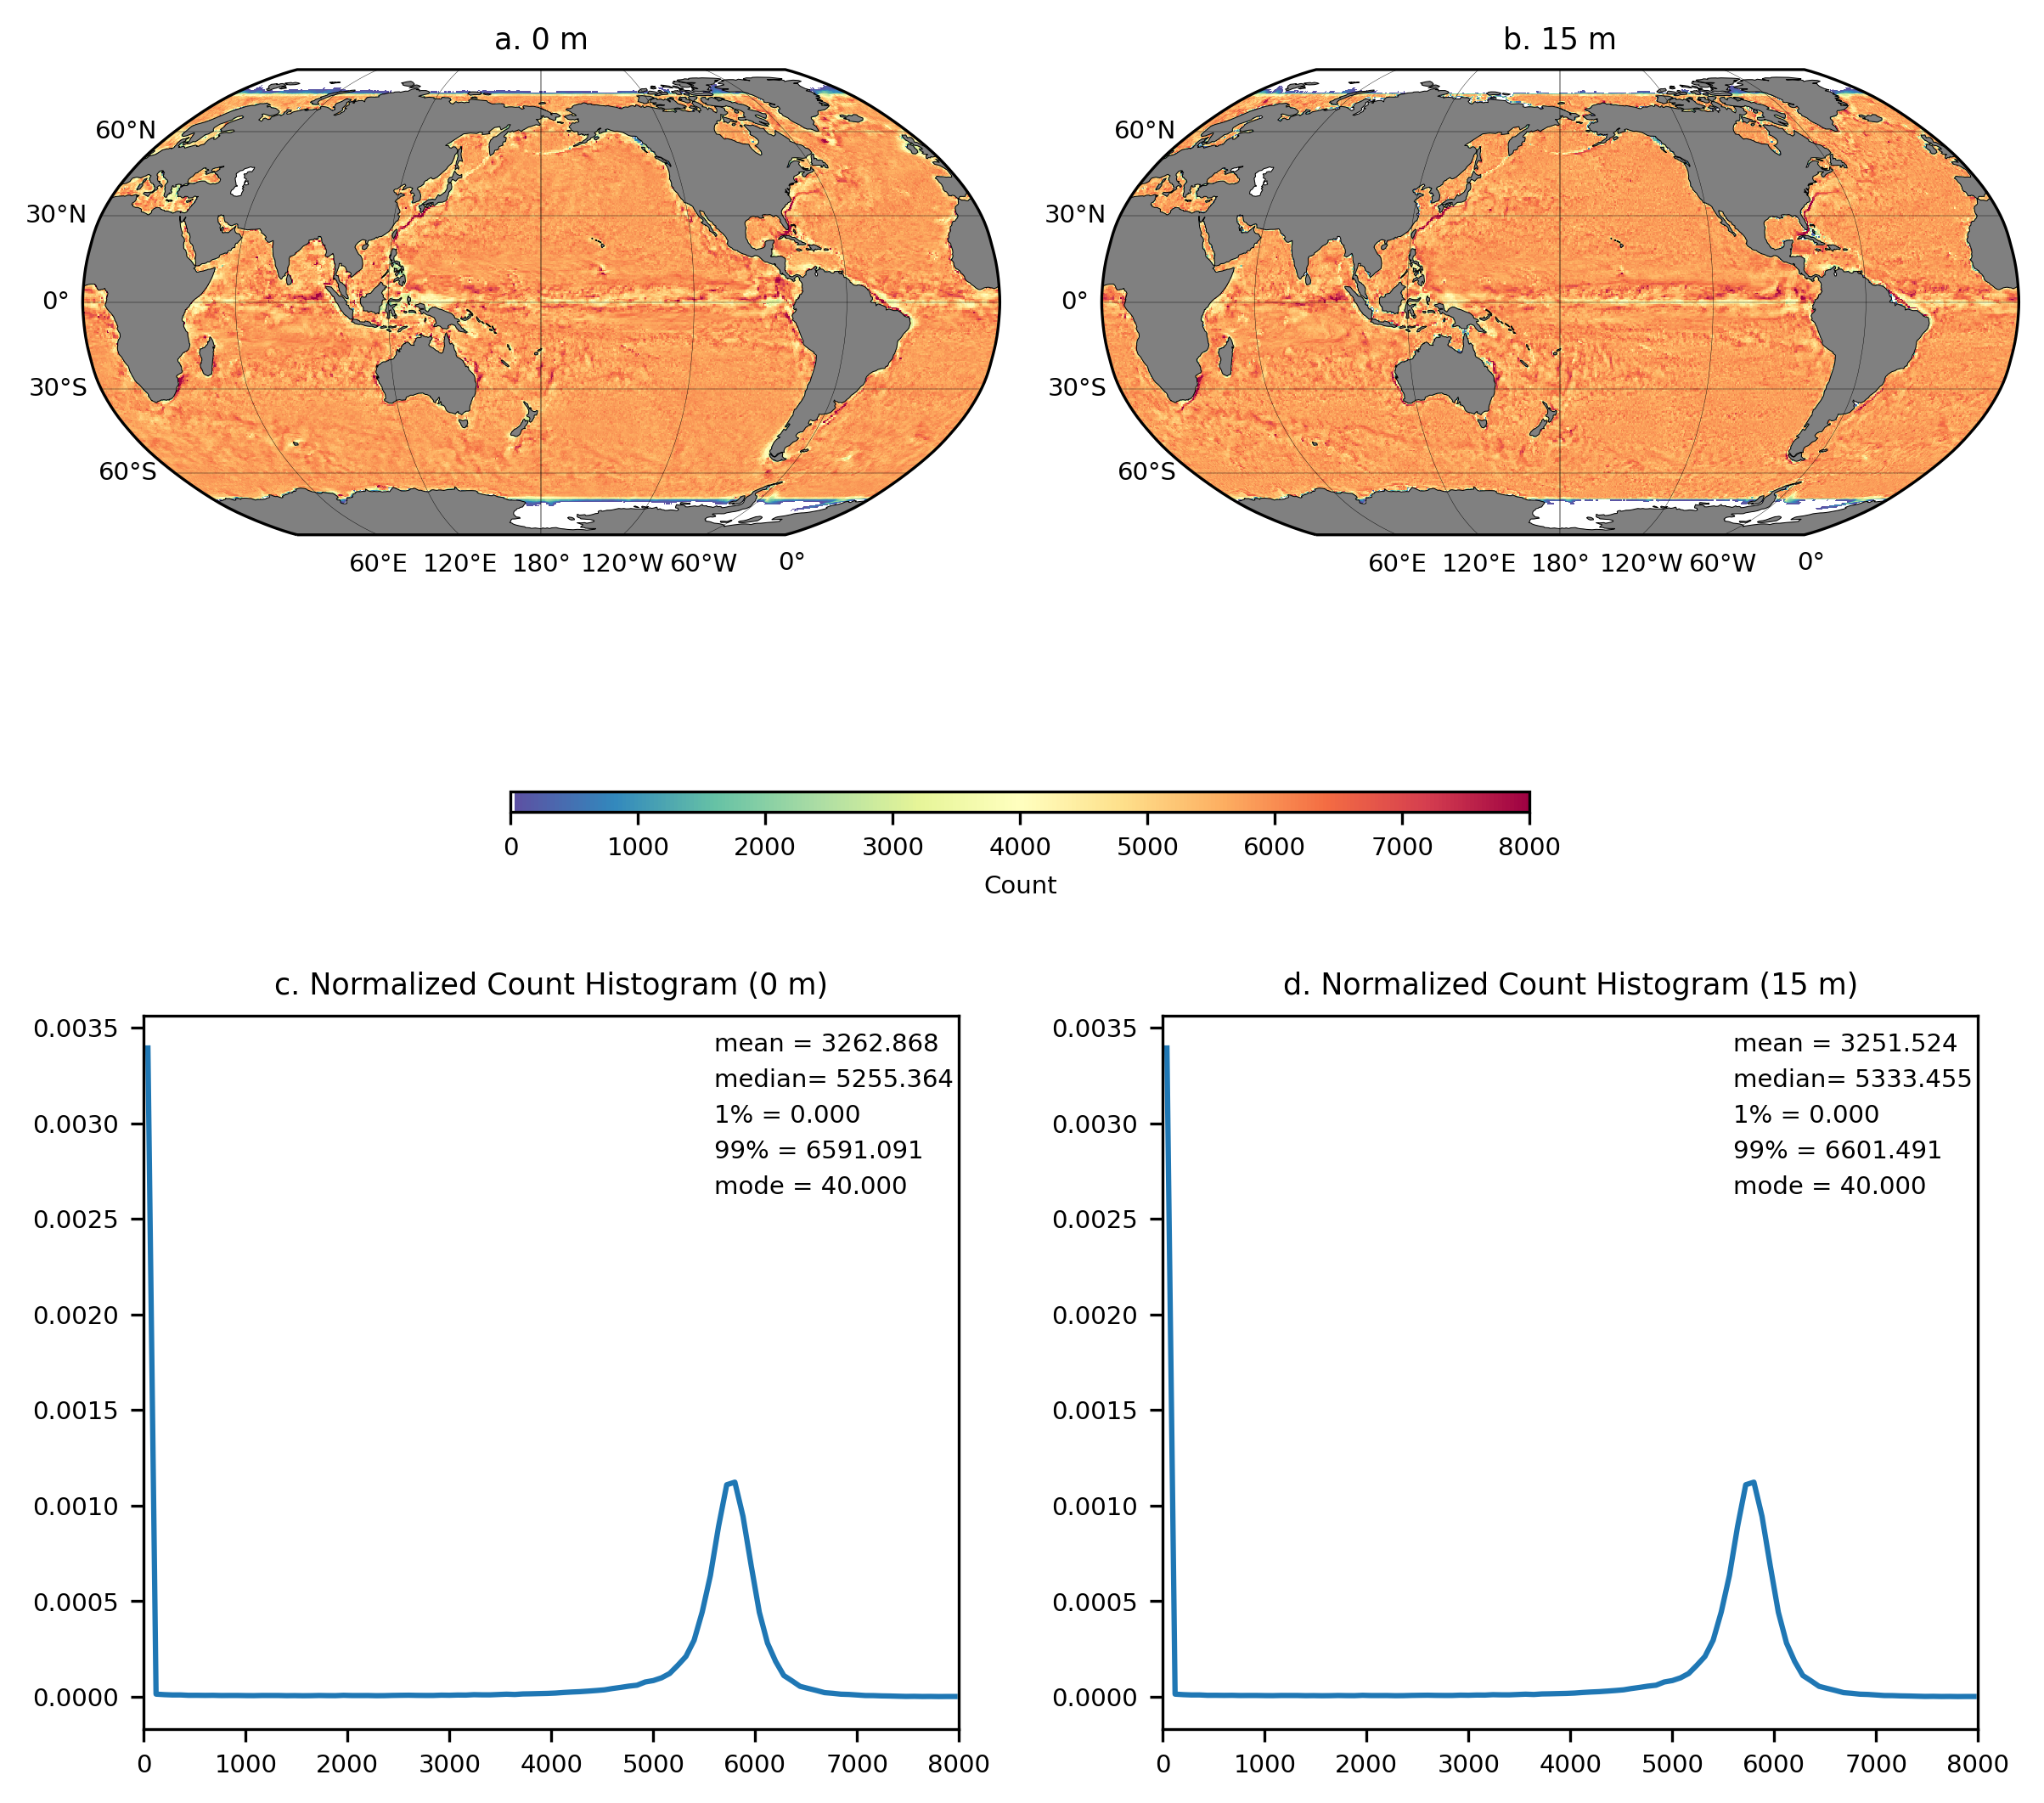

In [125]:
# Create a colormap
cmap = plt.get_cmap('Spectral_r')

# Modify the colormap to set 0 to white
cmaplist = [cmap(i) for i in range(cmap.N)]
cmaplist[0] = (1, 1, 1, 1.0)  # Set the first color in the colormap to white
cmap = colors.LinearSegmentedColormap.from_list('Custom cmap', cmaplist, cmap.N)

# create figure and image
fig = plt.figure(figsize = (8,8), dpi = 300)
ax1 = fig.add_subplot(2,2,1,projection=ccrs.Robinson(central_longitude=-180))
image = plt.pcolormesh(lon, lat, 
                den.transpose(),
                cmap=cmap, 
                transform=ccrs.PlateCarree(),
                vmin=0, vmax=8000) 

# # gridlines and labels
gl = ax1.gridlines(color='k', linewidth=0.1, linestyle='-',
xlocs=np.arange(-180, 181, 60), ylocs=np.arange(-90, 91, 30),
draw_labels=True)
gl.bottom_labels = True
gl.right_labels = False
gl.top_labels = False

# add coastlines and land features
ax1.add_feature(cfeature.LAND, facecolor='grey', zorder=1)
ax1.add_feature(cfeature.COASTLINE, linewidth=0.25, zorder=1)
ax1.set_title('a. 0 m')

ax2 = fig.add_subplot(2,2,2,projection=ccrs.Robinson(central_longitude=-180))
image = plt.pcolormesh(lon, lat, 
                den15.transpose(),
                cmap=cmap, 
                transform=ccrs.PlateCarree(),
                vmin=0, vmax=8000) 

# # gridlines and labels
gl = ax2.gridlines(color='k', linewidth=0.1, linestyle='-',
xlocs=np.arange(-180, 181, 60), ylocs=np.arange(-90, 91, 30),
draw_labels=True)
gl.bottom_labels = True
gl.right_labels = False
gl.top_labels = False

# add coastlines and land features
ax2.add_feature(cfeature.LAND, facecolor='grey', zorder=1)
ax2.add_feature(cfeature.COASTLINE, linewidth=0.25, zorder=1)
ax2.set_title('b. 15 m')

cbar_ax = fig.add_axes([0.25, 0.6, 0.5, 0.01]) # left, bottom, width, height
cb = fig.colorbar(image, cax=cbar_ax, orientation = "horizontal", ticks = np.linspace(0, 8000, 9), label = 'Count')


cmap = plt.cm.viridis
# third subplot
ax3 = fig.add_subplot(2,2,3)

# take midpoint of bin to plot as x
bins_mean = [0.5 * (bins[i] + bins[i+1]) for i in range(len(n))]
# plot x = midpoint of bin, y = normalized count
plt.plot(bins_mean, n, linestyle = '-')

ax3.set_title('c. Normalized Count Histogram (0 m)')
ax3.set_xlim(0,8000)
ax3.annotate("mean = "+str('{:04.3f}'.format((float(np.nanmean(den))))), xy=(0.7,0.95),xycoords='axes fraction',
             fontsize=7)
ax3.annotate("median= "+str('{:04.3f}'.format((float(np.nanmedian(den))))), xy=(0.7,0.9),xycoords='axes fraction',
             fontsize=7)
ax3.annotate("1% = "+str('{:04.3f}'.format((float(np.nanpercentile(den, [1]))))), xy=(0.7,0.85),xycoords='axes fraction',
             fontsize=7)
ax3.annotate("99% = "+str('{:04.3f}'.format((float(np.nanpercentile(den, [99]))))), xy=(0.7,0.8),xycoords='axes fraction',
             fontsize=7)
# mode = bin with highest count
ax3.annotate("mode = "+str('{:04.3f}'.format((float(bins_mean[np.argmax(n)])))), xy=(0.7,0.75),xycoords='axes fraction',
             fontsize=7)

# fourth subplot
ax4 = fig.add_subplot(2,2,3)

# take midpoint of bin to plot as x
bins_mean = [0.5 * (bins[i] + bins[i+1]) for i in range(len(n))]
# plot x = midpoint of bin, y = normalized count
plt.plot(bins_mean, n, linestyle = '-')

ax4.set_title('d. Normalized Count Histogram (15 m)')
ax4.set_xlim(0,8000)
ax4.annotate("mean = "+str('{:04.3f}'.format((float(np.nanmean(den15))))), xy=(0.7,0.95),xycoords='axes fraction',
             fontsize=7)
ax4.annotate("median= "+str('{:04.3f}'.format((float(np.nanmedian(den15))))), xy=(0.7,0.9),xycoords='axes fraction',
             fontsize=7)
ax4.annotate("1% = "+str('{:04.3f}'.format((float(np.nanpercentile(den15, [1]))))), xy=(0.7,0.85),xycoords='axes fraction',
             fontsize=7)
ax4.annotate("99% = "+str('{:04.3f}'.format((float(np.nanpercentile(den15, [99]))))), xy=(0.7,0.8),xycoords='axes fraction',
             fontsize=7)
# mode = bin with highest count
ax4.annotate("mode = "+str('{:04.3f}'.format((float(bins_mean[np.argmax(n)])))), xy=(0.7,0.75),xycoords='axes fraction',
             fontsize=7)

# set font size for lat/lon labels
plt.rcParams.update({'font.size': 7, 'font.family': 'sans-serif'})

# Set positions for each subplot
ax1.set_position([0.04, 0.7, 0.45, 0.3])  # left, bottom, width, height
ax2.set_position([0.54, 0.7, 0.45, 0.3])
ax3.set_position([0.07, 0.15, 0.4, 0.35])
ax4.set_position([0.57, 0.15, 0.4, 0.35])
plt.savefig('/Users/elifaigle/Desktop/aws_density_sub.png', dpi = 300)